In [3]:
import pandas as pd

In [4]:
#vac_data = pd.read_csv("OxCGRT_vaccines_full.csv")
#latest_data = pd.read_csv("OxCGRT_nat_latest.csv")
combined_data = pd.read_csv("OxCGRT_nat_latest_combined.csv")
#response_data = pd.read_csv("OxCGRT_nat_latest_responses.csv")

C:\Users\Chris\AppData\Local\Temp\ipykernel_6688\4174889289.py:3: DtypeWarning: Columns (2,3,23,44) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv("OxCGRT_nat_latest_combined.csv")


In [94]:
#print(latest_data.columns)

 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
       'V2B_Vaccine age eligibility/availability age floor (general population summary)',
       'V2C_Vaccine age eligibility/availability age floor (at risk summary)',
       'V2D_Medically/ clinically vulnerable (Non-elderly)', 'V2E_Education',
       'V2F_Frontline workers  (non healthcare)',
       'V2G_Frontline workers  (healthcare)',
       'V3_Vaccine Financial Support (summary)',
       'V4_Mandatory Vaccination (summary)',

In [6]:
print(combined_data.columns)

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_combined_numeric', 'C1M_combined',
       'C2M_combined_numeric', 'C2M_combined', 'C3M_combined_numeric',
       'C3M_combined', 'C4M_combined_numeric', 'C4M_combined',
       'C5M_combined_numeric', 'C5M_combined', 'C6M_combined_numeric',
       'C6M_combined', 'C7M_combined_numeric', 'C7M_combined',
       'C8EV_combined_numeric', 'C8EV_combined', 'E1_combined_numeric',
       'E1_combined', 'E2_combined_numeric', 'E2_combined',
       'H1_combined_numeric', 'H1_combined', 'H2_combined_numeric',
       'H2_combined', 'H3_combined_numeric', 'H3_combined',
       'H6M_combined_numeric', 'H6M_combined', 'H7_combined_numeric',
       'H7_combined', 'H8M_combined_numeric', 'H8M_combined', 'V1 (summary)',
       'V2 (summary)', 'V3 (summary)', 'V4 (summary)', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'Stringen

In [7]:
# Taking data starting April 1st, 2020 since earlier months has many missing data
temp = combined_data.loc[combined_data["Date"]>20200331]


In [8]:
df = temp.drop(["RegionName", "RegionCode"], axis=1)
display(df.head())

,CountryName,CountryCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
91,Aruba,ABW,NAT_TOTAL,20200401,3.0,3G,3.0,3G,2.0,2G,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
92,Aruba,ABW,NAT_TOTAL,20200402,3.0,3G,3.0,3G,2.0,2G,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
93,Aruba,ABW,NAT_TOTAL,20200403,3.0,3G,3.0,3G,2.0,2G,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
94,Aruba,ABW,NAT_TOTAL,20200404,3.0,3G,3.0,3G,2.0,2G,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
95,Aruba,ABW,NAT_TOTAL,20200405,3.0,3G,3.0,3G,2.0,2G,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5


In [9]:
# Change to date format and get year
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')
df["Year"] = df["Date"].dt.year
df.head()

,CountryName,CountryCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,...,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay,Year
91,Aruba,ABW,NAT_TOTAL,2020-04-01,3.0,3G,3.0,3G,2.0,2G,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
92,Aruba,ABW,NAT_TOTAL,2020-04-02,3.0,3G,3.0,3G,2.0,2G,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
93,Aruba,ABW,NAT_TOTAL,2020-04-03,3.0,3G,3.0,3G,2.0,2G,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
94,Aruba,ABW,NAT_TOTAL,2020-04-04,3.0,3G,3.0,3G,2.0,2G,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
95,Aruba,ABW,NAT_TOTAL,2020-04-05,3.0,3G,3.0,3G,2.0,2G,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020


In [10]:
df2 = df[['CountryName','CountryCode', 'Date', 'Year', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average_ForDisplay',
       'GovernmentResponseIndex_Average_ForDisplay',
       'ContainmentHealthIndex_Average_ForDisplay',
       'EconomicSupportIndex_ForDisplay']]

df2.head()

,CountryName,CountryCode,Date,Year,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay
91,Aruba,ABW,2020-04-01,2020,55.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
92,Aruba,ABW,2020-04-02,2020,60.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
93,Aruba,ABW,2020-04-03,2020,62.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
94,Aruba,ABW,2020-04-04,2020,64.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
95,Aruba,ABW,2020-04-05,2020,64.0,0.0,NV,0.0,85.19,70.31,67.86,87.5


In [27]:

df3 = df2.groupby(["CountryName", "Year"])

In [28]:
df4_stats = df3["ConfirmedCases", "ConfirmedDeaths", "PopulationVaccinated"].max()
df4_stats.head(20)
#df4_stats.to_excel("general_stats.xlsx")

C:\Users\Chris\AppData\Local\Temp\ipykernel_6688\3608172580.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4_stats = df3["ConfirmedCases", "ConfirmedDeaths", "PopulationVaccinated"].max()


ConfirmedCases  ConfirmedDeaths  PopulationVaccinated
CountryName Year                                                       
Afghanistan 2020         52330.0           2189.0                  0.00
            2021        158084.0           7356.0                  9.13
            2022        207559.0           7849.0                 26.15
Albania     2020         58316.0           1181.0                  0.00
            2021        210224.0           3217.0                 36.28
            2022        333806.0           3595.0                 44.68
Algeria     2020         99610.0           2756.0                  0.00
            2021        218432.0           6276.0                 12.49
            2022        271228.0           6881.0                 14.43
Andorra     2020          8049.0             84.0                  0.00
            2021         23740.0            140.0                 64.37
            2022         47751.0            165.0                 66.99
Angola      2020         17553.0            405.0                  0.00
            2021         81593.0           1770.0                 11.04
            2022        105095.0           1930.0                 23.19
Argentina   2020       1625514.0          43245.0                  0.00
            2021       5654408.0         117169.0                 67.62
            2022       9891139.0         130124.0                 76.45
Aruba       2020          5489.0             49.0                  0.00
            2021         20461.0            181.0                 74.21

In [29]:
df4_index = df3[[
       'StringencyIndex_Average_ForDisplay',
       'GovernmentResponseIndex_Average_ForDisplay',
       'ContainmentHealthIndex_Average_ForDisplay',
       'EconomicSupportIndex_ForDisplay']].mean()
#df4_index.to_excel("covid_index_scores.xlsx")

df4_index.head(20)

StringencyIndex_Average_ForDisplay  \
CountryName Year                                       
Afghanistan 2020                           50.400873   
            2021                           29.242219   
            2022                           11.415644   
Albania     2020                           66.484618   
            2021                           48.590904   
            2022                           21.522548   
Algeria     2020                           75.927345   
            2021                           59.611589   
            2022                           35.872055   
Andorra     2020                           48.257455   
            2021                           50.087534   
            2022                           11.986110   
Angola      2020                           74.392036   
            2021                           57.622137   
            2022                           37.656849   
Argentina   2020                           87.617527   
            2021                           66.841315   
            2022                           19.031068   
Aruba       2020                           57.403782   
            2021                           42.777753   

                  GovernmentResponseIndex_Average_ForDisplay  \
CountryName Year                                               
Afghanistan 2020                                   41.275527   
            2021                                   24.306740   
            2022                                   14.827370   
Albania     2020                                   63.669964   
            2021                                   55.050986   
            2022                                   27.499918   
Algeria     2020                                   61.964691   
            2021                                   59.721370   
            2022                                   37.823890   
Andorra     2020                                   57.502618   
            2021                                   62.595151   
            2022                                   32.150411   
Angola      2020                                   54.910873   
            2021                                   48.587452   
            2022                                   41.235178   
Argentina   2020                                   76.753564   
            2021                                   64.280274   
            2022                                   33.759452   
Aruba       2020                                   54.337745   
            2021                                   42.050356   

                  ContainmentHealthIndex_Average_ForDisplay  \
CountryName Year                                              
Afghanistan 2020                                  46.769891   
            2021                                  27.781370   
            2022                                  16.943863   
Albania     2020                                  64.499673   
            2021                                  55.216329   
            2022                                  30.274904   
Algeria     2020                                  64.143018   
            2021                                  62.100164   
            2022                                  42.521205   
Andorra     2020                                  52.290800   
            2021                                  60.834932   
            2022                                  33.747973   
Angola      2020                                  58.820255   
            2021                                  55.527068   
            2022                                  44.512986   
Argentina   2020                                  77.005418   
            2021                                  67.112767   
            2022                                  34.325781   
Aruba       2020                                  52.001709   
            2021                                  46.

In [23]:
df5 = pd.merge(df4_stats, df4_index, how='inner', on=['CountryName', 'Year'])
df5.head()

ConfirmedCases  ConfirmedDeaths  PopulationVaccinated  \
CountryName Year                                                          
Afghanistan 2020         52330.0           2189.0                  0.00   
            2021        158084.0           7356.0                  9.13   
            2022        207559.0           7849.0                 26.15   
Albania     2020         58316.0           1181.0                  0.00   
            2021        210224.0           3217.0                 36.28   

                  StringencyIndex_Average_ForDisplay  \
CountryName Year                                       
Afghanistan 2020                           50.400873   
            2021                           29.242219   
            2022                           11.415644   
Albania     2020                           66.484618   
            2021                           48.590904   

                  GovernmentResponseIndex_Average_ForDisplay  \
CountryName Year                                               
Afghanistan 2020                                   41.275527   
            2021                                   24.306740   
            2022                                   14.827370   
Albania     2020                                   63.669964   
            2021                                   55.050986   

                  ContainmentHealthIndex_Average_ForDisplay  \
CountryName Year                                              
Afghanistan 2020                                  46.769891   
            2021                                  27.781370   
            2022                                  16.943863   
Albania     2020                                  64.499673   
            2021                                  55.216329   

                  EconomicSupportIndex_ForDisplay  
CountryName Year                                   
Afghanistan 2020                         2.818182  
            2021                         0.000000  
            2022                         0.000000  
Albania     2020                        57.863636  
            2021                        53.904110

In [76]:
test = df.groupby(["CountryName", "Year"])[
       'C2M_combined', 
       'C6M_combined', 'C8EV_combined',
       'E1_combined', 'E2_combined',
       'H2_combined',
       'H7_combined'].agg(pd.Series.mode)

#test.to_excel("covid_sample_indicators.xlsx")

test.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_6688\2223690155.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = df.groupby(["CountryName", "Year"])[


C2M_combined C6M_combined C8EV_combined E1_combined  \
CountryName Year                                                       
Afghanistan 2020           3T           2T           1.0           0   
            2021           2G            0           1.0           0   
            2022           2T            0           0.0           0   
Albania     2020           2G           1G           1.0          1A   
            2021           1G           2G           1.0          1A   

                 E2_combined H2_combined H7_combined  
CountryName Year                                      
Afghanistan 2020         0.0         1.0           0  
            2021         0.0         1.0          1G  
            2022         0.0         0.0          5G  
Albania     2020         1.0         2.0           0  
            2021         1.0         2.0          2G

In [81]:
#test2 = df.groupby(["CountryName", "Year"])[
 #      'C2M_combined_numeric', 'C2M_combined', 
  #     'C6M_combined_numeric', 'C6M_combined', 'C8EV_combined_numeric', 'C8EV_combined', 'E1_combined_numeric',
   #    'E1_combined', 'E2_combined_numeric', 'E2_combined', 'H7_combined_numeric',
    #   'H7_combined'].agg(pd.Series.mode)

#test2.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_6688\3202370893.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test2 = df.groupby(["CountryName", "Year"])[


C2M_combined_numeric C2M_combined C6M_combined_numeric  \
CountryName Year                                                          
Afghanistan 2020                  2.5           3T                  1.5   
            2021                  2.0           2G                  0.0   
            2022                  1.5           2T                  0.0   
Albania     2020                  2.0           2G                  1.0   
            2021                  1.0           1G                  2.0   

                 C6M_combined C8EV_combined_numeric C8EV_combined  \
CountryName Year                                                    
Afghanistan 2020           2T                   1.0           1.0   
            2021            0                   1.0           1.0   
            2022            0                   0.0           0.0   
Albania     2020           1G                   1.0           1.0   
            2021           2G                   1.0           1.0   

                 E1_combined_numeric E1_combined E2_combined_numeric  \
CountryName Year                                                       
Afghanistan 2020                 0.0           0                 0.0   
            2021                 0.0           0                 0.0   
            2022                 0.0           0                 0.0   
Albania     2020                 1.0          1A                 1.0   
            2021                 1.0          1A                 1.0   

                 E2_combined H7_combined_numeric H7_combined  
CountryName Year                                              
Afghanistan 2020         0.0                 0.0           0  
            2021         0.0                 1.0          1G  
            2022         0.0                 5.0          5G  
Albania     2020         1.0                 0.0           0  
            2021         1.0                 2.0          2G

In [86]:
df6 = pd.merge(df5.reset_index(), test.reset_index(), how='inner', on=['CountryName', 'Year'] )
df6.head(20)

,CountryName,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined
0,Afghanistan,2020,52330.0,2189.0,0.00,50.400873,41.275527,46.769891,2.818182,3T,2T,1.0,0,0.0,1.0,0
1,Afghanistan,2021,158084.0,7356.0,9.13,29.242219,24.306740,27.781370,0.000000,2G,0,1.0,0,0.0,1.0,1G
2,Afghanistan,2022,207559.0,7849.0,26.15,11.415644,14.827370,16.943863,0.000000,2T,0,0.0,0,0.0,0.0,5G
3,Albania,2020,58316.0,1181.0,0.00,66.484618,63.669964,64.499673,57.863636,2G,1G,1.0,1A,1.0,2.0,0
4,Albania,2021,210224.0,3217.0,36.28,48.590904,55.050986,55.216329,53.904110,1G,2G,1.0,1A,1.0,2.0,2G
5,Albania,2022,333806.0,3595.0,44.68,21.522548,27.499918,30.274904,8.082192,0,0,0.0,0,0.0,1.0,5G
6,Algeria,2020,99610.0,2756.0,0.00,75.927345,61.964691,64.143018,46.727273,2G,2T,4.0,0,2.0,1.0,0
7,Algeria,2021,218432.0,6276.0,12.49,59.611589,59.721370,62.100164,43.082192,1G,2T,4.0,1A,1.0,2.0,3G
8,Algeria,2022,271228.0,6881.0,14.43,35.872055,37.823890,42.521205,4.931507,2G,0,1.0,0,0.0,3.0,5G
9,Andorra,2020,8049.0,84.0,0.00,48.257455,57.502618,52.290800,94.000000,2G,0,2.0,2A,2.0,3.0,0


In [91]:
df7 = df6.loc[(df6["CountryName"]== "Argentina") | (df6["CountryName"]=="Canada") | (df6["CountryName"]== "China")|(df6["CountryName"]== "Germany")]
df7.head(20)

,CountryName,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined
15,Argentina,2020,1625514.0,43245.0,0.00,87.617527,76.753564,77.005418,75.000000,2T,2T,4.0,1A,2.0,1.0,0
16,Argentina,2021,5654408.0,117169.0,67.62,66.841315,64.280274,67.112767,44.452055,2T,2T,4.0,1A,1.0,2.0,3G
17,Argentina,2022,9891139.0,130124.0,76.45,19.031068,33.759452,34.325781,29.794521,0,0,1.0,0,0.0,3.0,5G
90,Canada,2020,590249.0,15736.0,0.00,65.805873,62.319270,62.061073,64.123377,2G,1G,4.0,2F,1.0,2.0,0
91,Canada,2021,2223735.0,30320.0,85.90,58.355035,60.290380,64.322691,32.062133,1G,1G,4.0,1F,1.0,2.0,5G
92,Canada,2022,4505142.0,49238.0,91.80,22.749434,34.679932,35.182765,31.164384,0,0,1.0,0,1.0,1.0,5G
105,China,2020,93679.0,4733.0,0.00,71.347200,65.369091,69.248036,38.227273,1G,1G,4.0,1F,1.0,2.0,0
106,China,2021,115168.0,4890.0,84.68,71.183534,72.908055,74.396603,62.500000,1G,0,3.0,0,0.0,3.0,5G
107,China,2022,1956071.0,5549.0,89.35,71.085863,76.252329,78.214712,62.500000,1G,1G,3.0,0,0.0,3.0,5G
186,Germany,2020,1719737.0,33071.0,0.00,62.227309,58.715164,60.616873,45.409091,2T,0,3.0,2F,0.0,3.0,0


In [88]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
df2020 = df7.loc[df7["Year"]== 2020]
df2021 = df7.loc[df7["Year"]== 2021]
df2022 = df7.loc[df7["Year"]== 2022]

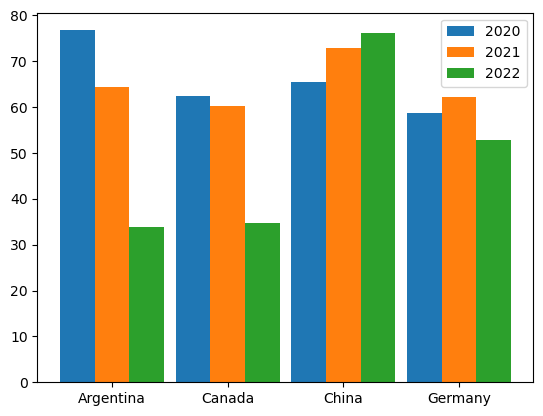

In [93]:
width = 0.3
i = np.arange(4)
plt.bar(i, df2020["GovernmentResponseIndex_Average_ForDisplay"], width, label="2020")
plt.bar(i + width, df2021["GovernmentResponseIndex_Average_ForDisplay"], width, label="2021")
plt.bar(i + (2*width), df2022["GovernmentResponseIndex_Average_ForDisplay"], width, label="2022")
plt.xticks(i + width,df2020["CountryName"].tolist())
plt.legend()
plt.show()

['Argentina',
 'Argentina',
 'Argentina',
 'Canada',
 'Canada',
 'Canada',
 'China',
 'China',
 'China',
 'Germany',
 'Germany',
 'Germany']